In [2]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import *
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
import geopy.distance
import xarray as xr
import seaborn as sns
from tool_code import *
%matplotlib inline
import os, pickle 
import metpy
import metpy.calc as mpcalc
#"""

from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#"""

import warnings
warnings.filterwarnings("ignore")

In [3]:
f_zpt =  h5py.File('../simulation/data/20181018_central_asia_2_470cloud_test2_20181018/zpt.h5')

In [28]:
f_zpt.keys()

<KeysViewHDF5 ['albedo_o2a', 'albedo_sco2', 'albedo_wco2', 'd_co2_lay', 'd_h2o_lay', 'd_o2_lay', 'dz', 'h2o_vmr', 'h_edge', 'h_lay', 'p_edge', 'p_lay', 'sza', 't_edge', 't_lay', 'u_lay', 'v_lay', 'vza']>

In [30]:
np.array(dewT)

NameError: name 'dewT' is not defined

In [34]:
f_zpt['p_lay'][...]

array([906.11508608, 862.38735608, 820.19541619, 779.43898316,
       740.26895259, 702.76161076, 666.78237218, 632.40035491,
       599.42761564, 567.80448792, 534.74631172, 500.606176  ,
       468.21627791, 437.56432715, 408.565857  , 381.14058072,
       355.17067218, 330.6757447 , 307.72662991, 285.62007726,
       255.15847394, 218.56958302, 186.49983642, 158.92612672,
        89.93756225,  36.6897818 ,  16.95043876,   8.03328446,
         3.90385105])

In [35]:
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

In [36]:
units('m/s')

1.0 <Unit('meter / second')>

In [43]:
dewT = np.array(mpcalc.dewpoint(f_zpt['h2o_vmr'][...]*f_zpt['p_lay'][...] * units.hPa)* units.K)

In [44]:
wind_dir = metpy.calc.wind_direction(f_zpt['u_lay'][...]*units('m/s'), f_zpt['v_lay'][...]*units('m/s'))
wind_speed = metpy.calc.wind_speed(f_zpt['u_lay'][...]*units('m/s'), f_zpt['v_lay'][...]*units('m/s'))

In [45]:
wind_dir

Magnitude,[173.75516078091104 282.41935337010693 277.3998839777981 261.1514767419786 250.31306589117725 256.9429312634657 268.553167163322 269.4605007470607 267.3092279008712 265.6095650254315 258.9828879293622 246.46372467172353 236.60210576863415 233.5500046790214 234.11606285860955 238.78510249121004 246.11540955697438 249.39392446024874 250.87795541447468 248.38649308523756 246.87084659392082 250.22295473776452 254.4697154374666 258.8584719363961 282.44645074929286 284.75230917170074 304.9752957498679 307.08765553527616 301.72314041071854]
Units,degree


In [39]:
wind_speed

Magnitude,[1.00152929269049 29.266003087862828 50.31803550661861 39.68234348100976 31.680837743836864 27.862114913013713 30.343589435506495 27.166207577027564 22.860754575309333 20.513566675112457 18.274332149659898 14.286731706489524 10.55829742462341 8.246118012941858 7.066364643389504 6.999084286594566 8.577974315234767 10.930803758057955 13.60884694863902 15.569135472972038 17.835453051301595 18.357396497136172 17.42976637158977 13.56702357038237 14.293122689981239 19.428852382835107 9.563015782380822 11.041370327143262 11.775718590433797]
Units,meter/second


In [46]:
p = f_zpt['p_lay'][...] * units.hPa
T = f_zpt['t_lay'][...] * units.K
Td = dewT * units.K
wind_speed = wind_speed# * units('m/s')
wind_dir = wind_dir# * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

In [47]:
wind_dir

Magnitude,[173.75516078091104 282.41935337010693 277.3998839777981 261.1514767419786 250.31306589117725 256.9429312634657 268.553167163322 269.4605007470607 267.3092279008712 265.6095650254315 258.9828879293622 246.46372467172353 236.60210576863415 233.5500046790214 234.11606285860955 238.78510249121004 246.11540955697438 249.39392446024874 250.87795541447468 248.38649308523756 246.87084659392082 250.22295473776452 254.4697154374666 258.8584719363961 282.44645074929286 284.75230917170074 304.9752957498679 307.08765553527616 301.72314041071854]
Units,degree


In [48]:
u

Magnitude,[-0.10894368953937218 28.58116952305397 49.898957882882996 39.21006267335024 29.82901016945216 27.141754471451414 30.333915452311885 27.16500328380899 22.835549423883627 20.4533705552536 17.937538990904656 13.09818182221823 8.814785649903435 6.632976815261432 5.725211017888948 5.985823626067631 7.8433813336429585 10.231475220016796 12.857950851195945 14.474464549620686 16.401870513909454 17.274611237847008 16.793389316121107 13.311324059859544 13.957203826420193 18.788393417281764 7.835928221647177 8.80785428038706 10.016412272473142]
Units,meter/second


In [55]:
v

Magnitude,[0.9955863581963454 -6.294099255115665 -6.480640357834975 6.104045322307517 10.672658172266086 6.294649445158023 0.7661547902190359 0.25579427045322095 1.073211191655538 1.5703664106728388 3.4922643751394937 5.705114880992758 5.8118154180140476 4.899191856987079 4.141915990696609 3.6272712013944464 3.4731847932248834 3.846996961183645 4.458005740206153 5.7347934032125565 7.005856777734684 6.211425982358417 4.6667795154036495 2.621598812311907 -3.080554751764371 -4.947380894113637 -5.48174240176041 -6.658345265648746 -6.191852187264936]
Units,meter/second


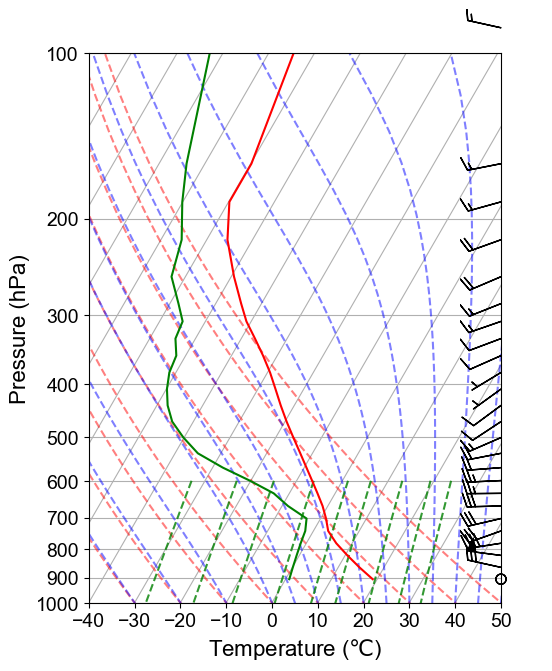

In [64]:
f = plt.figure(figsize=(6, 10))
f.tight_layout()



skew = SkewT(fig=f, aspect=120)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Set some better labels than the default
skew.ax.set_xlabel('Temperature ($\N{DEGREE CELSIUS}$)', fontsize=16)
skew.ax.set_ylabel('Pressure (hPa)', fontsize=16)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

skew.ax.tick_params(axis='both', labelsize=14)

f.savefig('atm_skew_T.png', dpi=150)
f.tight_layout()
f.savefig('transparentatm_skew_T.png', dpi=150, transparent=True)
plt.show()

In [4]:
# 'd_co2_lay', 'd_h2o_lay', 'd_o2_lay', 'dz', 'h2o_vmr',
p = f_zpt['p_lay'][...]
co2_pfl = f_zpt['d_co2_lay'][...]/(f_zpt['d_o2_lay'][...]/0.20935)
h2o_vmr_pfl = f_zpt['h2o_vmr'][...]

In [9]:
p

array([906.11508608, 862.38735608, 820.19541619, 779.43898316,
       740.26895259, 702.76161076, 666.78237218, 632.40035491,
       599.42761564, 567.80448792, 534.74631172, 500.606176  ,
       468.21627791, 437.56432715, 408.565857  , 381.14058072,
       355.17067218, 330.6757447 , 307.72662991, 285.62007726,
       255.15847394, 218.56958302, 186.49983642, 158.92612672,
        89.93756225,  36.6897818 ,  16.95043876,   8.03328446,
         3.90385105])

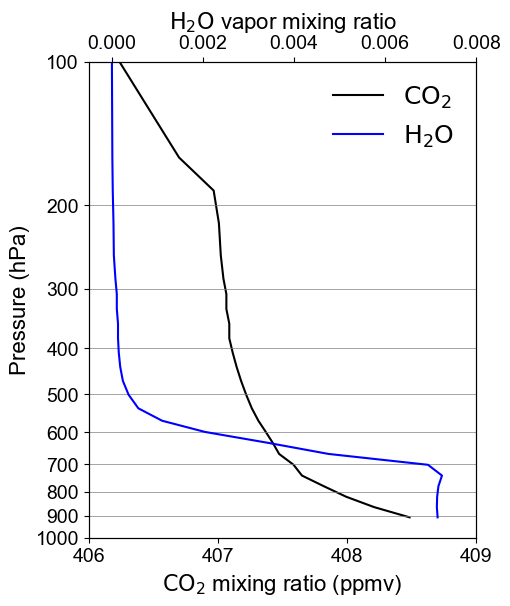

In [67]:
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(5, 7))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

label_size = 16

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)

x = np.arange(-5, 6)
x2 = x*2+1
y = x*2+np.random.random(size=len(x))*10

lns1 = ax1.plot(co2_pfl*1e6, p, 'k', label='$\mathrm{CO_2}$')
lns2 = ax2.plot(h2o_vmr_pfl, p, color='b', label='$\mathrm{H_2O}$')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, fontsize=label_size+2, frameon=False)


ax1.set_xlabel('$\mathrm{CO_2}$ mixing ratio (ppmv)', fontsize=label_size)
ax1.set_ylabel('Pressure (hPa)', fontsize=label_size)
ax1.set_yscale('log')

ax1.set_xlim(406, 409)
ax1.set_ylim(100, 1000)
ax1.invert_yaxis()
new_tick_locations = np.arange(0, 7, 1)

ax2.set_xlim(-0.0005, 0.008)

def tick_function(X, X_all):
    V = diam[np.where(X_all==X)]
    return ["%.0f" % z for z in V]

# Move twinned axis ticks and label from top to bottom
# ax2.xaxis.set_ticks_position("bottom")
# ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
#ax2.spines["bottom"].set_position(("axes", -0.25))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
# ax2.set_frame_on(True)
# ax2.patch.set_visible(False)

# for sp in ax2.spines.values():
#     sp.set_visible(False)
# ax2.spines["bottom"].set_visible(True)

ax1.set_xticks(np.arange(406, 410, 1))
ax1.set_yticks(np.arange(100, 1001, 100))
# ax1.set_yticklabels()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

ax1.hlines(np.arange(100, 1001, 100), 406, 409, 'grey', linewidth=0.5)

ax2.set_xlabel(r"$\mathrm{H_2O}$ vapor mixing ratio", fontsize=label_size)
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
#fig.savefig('fig_name.png', dpi=150, bbox_inches='tight')
plt.show()
fig.tight_layout()
fig.savefig('transparent-trace_gas_profile.png', dpi=150, transparent=True)